<a href="https://colab.research.google.com/github/AlexDiata/ITBA_3205_Eart-Benders/blob/main/Codes/LandSlideRisk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import numpy as np
import pandas as pan
import matplotlib.pyplot as plt
import seaborn as sb

# **Data Cleaning of Landslide Dataset**
*Source:*[*ICA Philippines, 2014 - Average Landslide Risk, 2014*](https://geonode.wfp.org/layers/geonode%3Aphl_ica_landsliderisk_geonode_mar2014)


*   This contains information about the average landslide risk - by second-level administrative area - used for the purposes of the Integrated Context Analysis (ICA) run in the Philippines in 2014.



In [91]:
url = 'https://raw.githubusercontent.com/AlexDiata/ITBA_3205_Eart-Benders/main/DATASET/phl_ica_landsliderisk_geonode_mar2014.csv'
df = pan.read_csv(url)
to_drop = ['FID','the_geom','iso3','adm0_name', 'LS_Risk' ]
new_df = df.drop(to_drop, inplace=True, axis=1)
display(df)

,adm1_name,adm2_name,LS_Class,LS_Text
0,Region XIII,Surigao del Sur,2,Medium
1,Region III,Tarlac,1,Low
2,Autonomous region in Muslim Mindanao,Tawi-Tawi,4,Very high
3,Region III,Zambales,1,Low
4,Region IX,Zamboanga del Norte,3,High
...,...,...,...,...
77,Region IV-B,Oriental Mindoro,3,High
78,Region IV-B,Palawan,3,High
79,Region III,Pampanga,1,Low
80,Region I,Pangasinan,1,Low


In [92]:
gdf = df.groupby('adm1_name')['LS_Class'].mean().round(0).reset_index()

display(gdf)

,adm1_name,LS_Class
0,Autonomous region in Muslim Mindanao,2.0
1,Cordillera Administrative region,4.0
2,National Capital region,0.0
3,Region I,1.0
4,Region II,3.0
5,Region III,1.0
6,Region IV-A,3.0
7,Region IV-B,3.0
8,Region IX,3.0
9,Region V,2.0


In [93]:
gdf2 = df.groupby('adm2_name')['LS_Class'].mean().round(0).reset_index()
gdf2.columns = gdf.columns.str.replace('adm1_name', 'Administrative area')
display(gdf2)

,Administrative area,LS_Class
0,Abra,3.0
1,Agusan del Norte,2.0
2,Agusan del Sur,1.0
3,Aklan,2.0
4,Albay,1.0
...,...,...
76,Tawi-Tawi,4.0
77,Zambales,1.0
78,Zamboanga Sibugay,3.0
79,Zamboanga del Norte,3.0


# **Landslide Dataset**


*   This contains information about the average landslide risk - by second-level administrative area - used for the purposes of the Integrated Context Analysis (ICA) run in the Philippines in 2014.




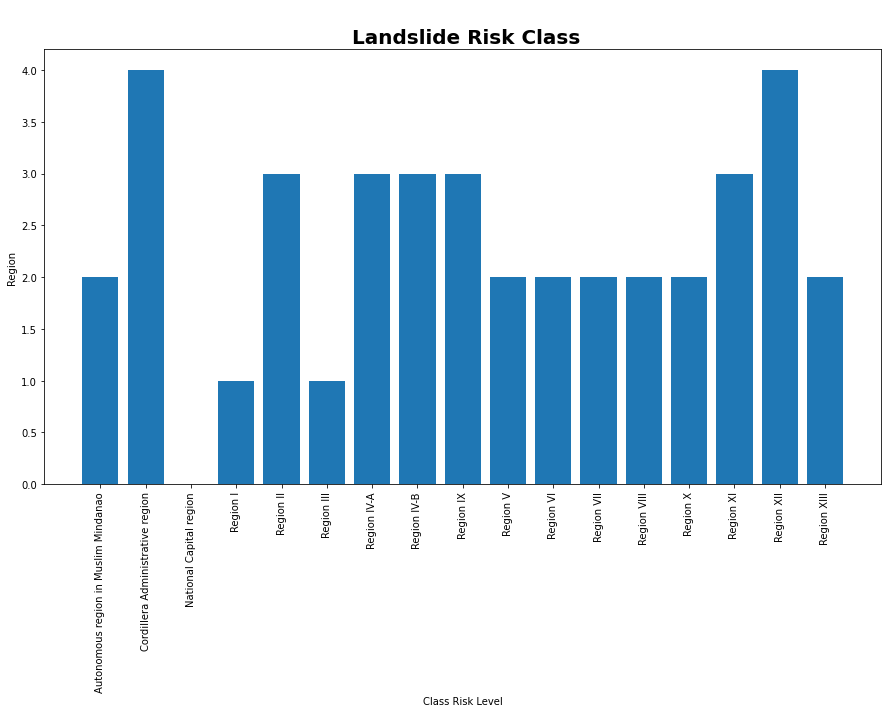

In [94]:
#changing the size of the entire graph
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)

#Creating plots
plt.title("\n Landslide Risk Class", fontweight="bold", fontsize=20)
plt.bar(gdf['adm1_name'], gdf['LS_Class'])
gdf.columns = gdf.columns.str.replace('adm1_name', 'Region')
plt.xticks(rotation='90')

plt.ylabel('Region')
plt.xlabel('Class Risk Level')
plt.show()

# **Data Cleaning of Deforestation Dataset**

*Source:*[ *Deforestation statistics for Philippines*](https://rainforests.mongabay.com/deforestation/2019/Philippines.htm)


*   This will provide the cleaned dataset for the recorded forest loss that occur within the Philippines from 2010-2018.


In [95]:
#Dataframe
url = 'https://raw.githubusercontent.com/AlexDiata/ITBA_3205_Eart-Benders/main/DATASET/Tree%20cover%20data%20for%20subnational%20administrative%20areas%20in%20Philippines.csv'
df2 = pan.read_csv(url)
#Dropping of columns that have irrelevant data
to_drop2 = ['Total','Tree cover','% cover','Loss', 
           '% loss','Avg loss/year','Loss 2001-2010','loss','Avg loss/year 2001-2010',
           'Loss 2011-2018','Avg loss/year 2011-2018',]
new_df2 = df2.drop(to_drop2, inplace=True, axis=1)
display(df2)

,Administrative area,Tree cover.1,Tree cover.2,loss.1
0,NaN,Extent,Extent,between
1,NaN,in 2010 (ha),in 2018 (ha),2011-2018
2,Abra,260337,258479,1%
3,Agusan del Norte,244975,234366,4%
4,Agusan del Sur,772606,707229,8%
...,...,...,...,...
80,Zamboanga Sibugay,180381,171121,5%
81,Zamboanga del Norte,448780,418404,7%
82,Zamboanga del Sur,315804,306193,3%
83,NaN,NaN,NaN,NaN


In [96]:
#Filling Nan/Na Cell
df2 = df2.fillna(0)
df2.drop(df2.head(2).index,inplace=True)
df2.drop(df2.tail(2).index,inplace=True)
df2['loss.1'] = df2['loss.1'].str.replace(r'\D', '').astype(int)

display(df2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


,Administrative area,Tree cover.1,Tree cover.2,loss.1
2,Abra,260337,258479,1
3,Agusan del Norte,244975,234366,4
4,Agusan del Sur,772606,707229,8
5,Aklan,115858,114432,1
6,Albay,174727,173006,1
...,...,...,...,...
78,Tawi-Tawi,100005,93363,7
79,Zambales,177982,175827,1
80,Zamboanga Sibugay,180381,171121,5
81,Zamboanga del Norte,448780,418404,7


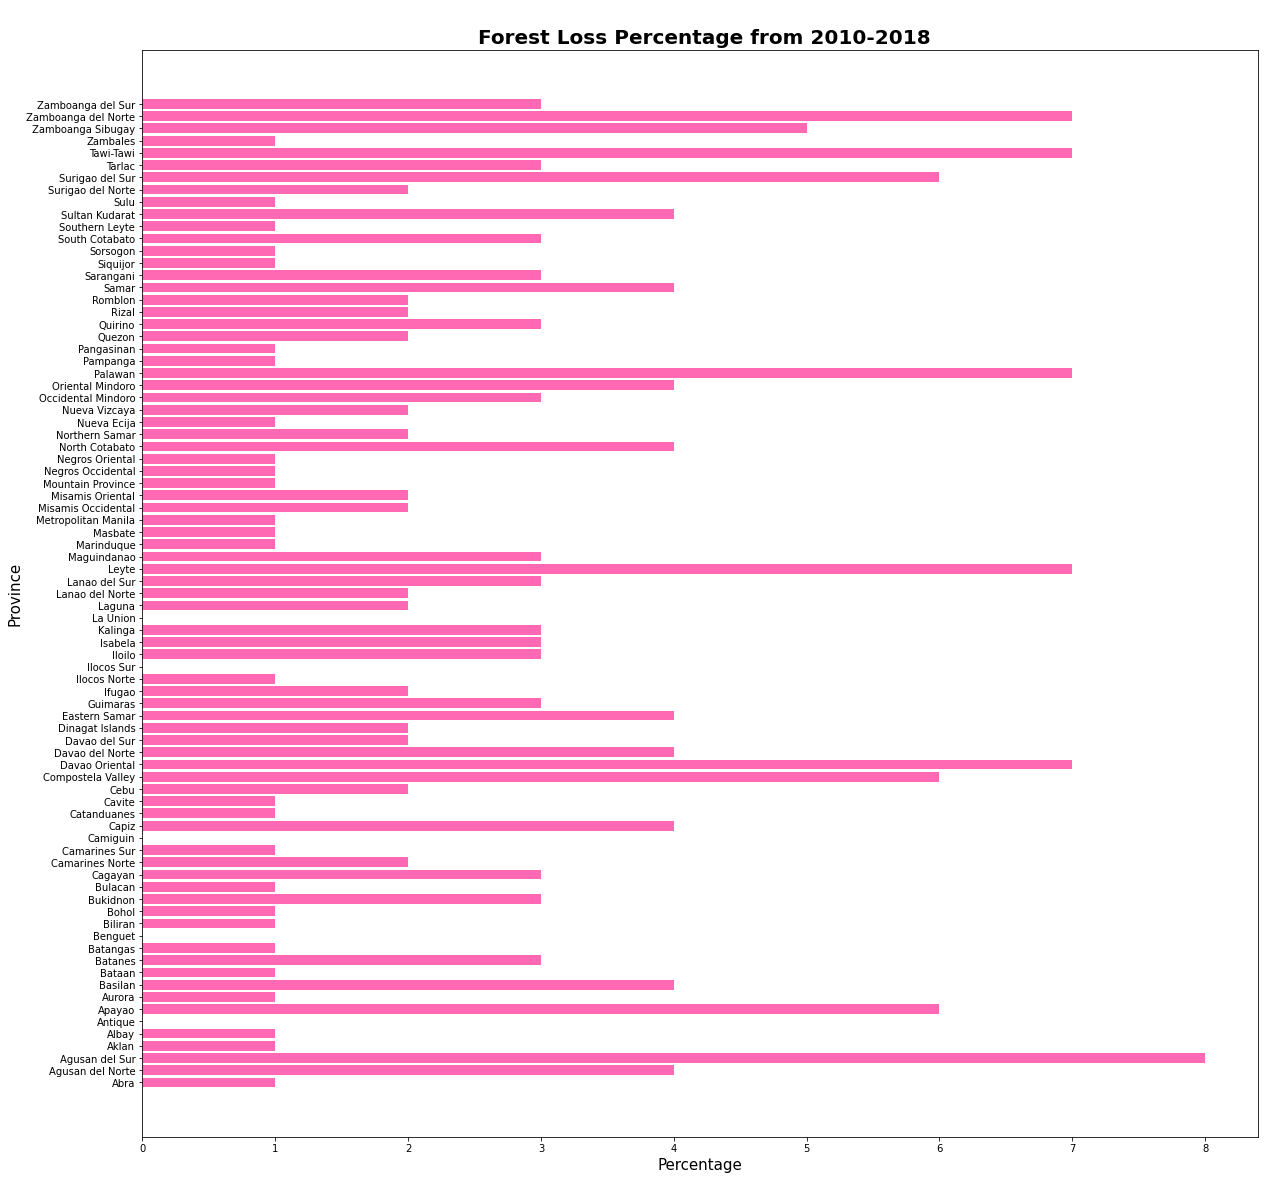

In [97]:
#Visualization
#getting all values from the dataframe/csv
Province = df2["Administrative area"]
Loss_Percentage = df2["loss.1"]

#changing the size of the entire graph
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)

#Creating plots
plt.title("\n Forest Loss Percentage from 2010-2018", fontweight="bold", fontsize=20)
plt.xlabel("Percentage", fontsize=15)
plt.ylabel("Province", fontsize=15)
plt.barh(Province, Loss_Percentage, color="hotpink")
plt.show() 

# **Precipitation Dataset**


*  This provides the dataset for the recorded annual precipitation(mm) average that happened in the Philippines from 2010-2018 (Regional Level).

In [98]:
#Dataframe
url = 'https://raw.githubusercontent.com/AlexDiata/ITBA_3205_Eart-Benders/main/DATASET/Precipitation%20Datasets/Regional%20Annual%20Rainfall(mm)%20%20Average%20%20from%202010-2018.csv'
df3 = pan.read_csv(url)
df3 = df3.replace({'Provinces' : { 'CAR' : 'Cordillera Administrative region', 'ARMM' : 'Autonomous region in Muslim Mindanao', 'NCR' : 'National Capital region', 'Region IV -A' : 'Region IV-A', 'Region IV -B' : 'Region IV-B'}})
df3.columns = ['Region', 'rain']

display(df3)


,Region,rain
0,Cordillera Administrative region,2721.58
1,Autonomous region in Muslim Mindanao,2154.80
2,National Capital region,2838.80
3,Region I,2421.03
4,Region II,2769.61
5,Region III,2733.04
6,Region IV-A,2998.22
7,Region IV-B,2224.19
8,Region V,3330.27
9,Region VI,2418.83


# **Elevation Dataset**
*Source:*[*Topogrophic-map*](https://en-nz.topographic-map.com/places/pki/Philippines/)
*  This provides the dataset for the recorded average elevation level in the Philippines (Regional Level).

In [99]:
#Dataframe
url = 'https://raw.githubusercontent.com/AlexDiata/ITBA_3205_Eart-Benders/main/DATASET/Average%20Elevation%20Level%20-%20Philippines%20(Regional%20Level).csv'
df4 = pan.read_csv(url)
df4 = df4.replace({'Region' : { 'Cordillera Administrative region' : 'Cordillera Administrative region', 'Autonomous region in Muslim Mindanao' : 'Autonomous region in Muslim Mindanao', 'National Capital region' : 'National Capital region'}})
display(df4)

,Region,elevation_m
0,Cordillera Administrative region,922
1,Autonomous region in Muslim Mindanao,81
2,National Capital region,11
3,Region I,58
4,Region II,72
5,Region III,24
6,Region IV-A,98
7,Region IV-B,34
8,Region V,49
9,Region VI,71


# **Linear Regression and Correlation Analysis**

### Preparation of Data for Analyisis

*   Merging of Landslide risk dataframe and Precipitation dataframe




In [100]:
mergedf = gdf.merge(df3, on='Region', how='inner')
display(mergedf)

,Region,LS_Class,rain
0,Autonomous region in Muslim Mindanao,2.0,2154.80
1,Cordillera Administrative region,4.0,2721.58
2,National Capital region,0.0,2838.80
3,Region I,1.0,2421.03
4,Region II,3.0,2769.61
5,Region III,1.0,2733.04
6,Region IV-A,3.0,2998.22
7,Region IV-B,3.0,2224.19
8,Region IX,3.0,2224.86
9,Region V,2.0,3330.27


### Preparation of Data for Analyisis

*   Merging of Landslide risk dataframe and elevation dataframe

In [101]:
df4.Region = df4.Region.apply(str).str.strip()
merged2 = gdf.merge(df4, on='Region', how= 'outer')
display(merged2)

,Region,LS_Class,elevation_m
0,Autonomous region in Muslim Mindanao,2.0,81
1,Cordillera Administrative region,4.0,922
2,National Capital region,0.0,11
3,Region I,1.0,58
4,Region II,3.0,72
5,Region III,1.0,24
6,Region IV-A,3.0,98
7,Region IV-B,3.0,34
8,Region IX,3.0,409
9,Region V,2.0,49


### Preparation of Data for Analysis

*   Merging of Landslide risk dataframe and Deforestation dataframe

In [102]:
mergede = gdf2.merge(df2, on='Administrative area', how='inner')
mergede = mergede[mergede["Administrative area"].str.contains("Quirino") == False]
to_drop3 = ['Tree cover.1','Tree cover.2',]
mergede.drop(to_drop3, inplace=True, axis=1)
display(mergede)

,Administrative area,LS_Class,loss.1
0,Abra,3.0,1
1,Agusan del Norte,2.0,4
2,Agusan del Sur,1.0,8
3,Aklan,2.0,1
4,Albay,1.0,1
...,...,...,...
76,Tawi-Tawi,4.0,7
77,Zambales,1.0,1
78,Zamboanga Sibugay,3.0,5
79,Zamboanga del Norte,3.0,7


### Landslide Risk Level X Annual Average Rainfall

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(11.424999999999997, 0.5, 'Annual Average Rainfall(mm)')

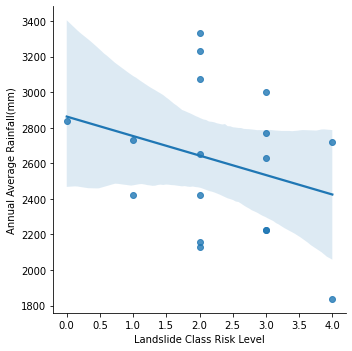

In [103]:
#Linear Regression
sb.lmplot('LS_Class','rain', data=mergedf)
plt.xlabel('Landslide Class Risk Level')
plt.ylabel('Annual Average Rainfall(mm)')


### Landslide Risk Level X Average Elevation Level

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(31.206249999999997, 0.5, 'Landslide Class Risk Level')

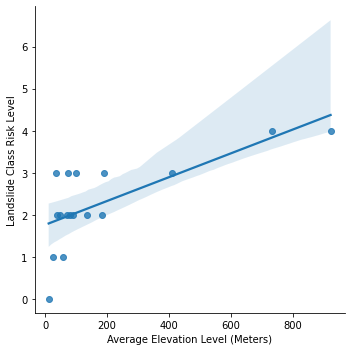

In [104]:
#Linear Regression
sb.lmplot('elevation_m','LS_Class', data=merged2)
plt.xlabel('Average Elevation Level (Meters)')
plt.ylabel('Landslide Class Risk Level')

### Landslide Risk Level X Deforestation %

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(21.581249999999997, 0.5, 'Landslide Class Risk Level')

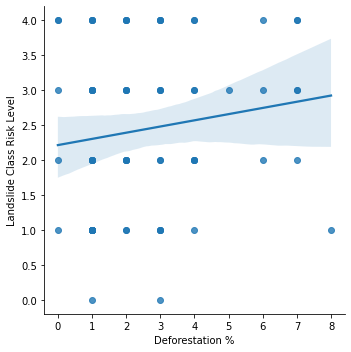

In [105]:
sb.lmplot('loss.1','LS_Class', data=mergede)
plt.xlabel('Deforestation %')
plt.ylabel('Landslide Class Risk Level')